In [1]:
from pydataset import data
from sklearn.model_selection import train_test_split

from scipy import stats
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import acquire as aq
import prepare as prep
import warnings

warnings.filterwarnings("ignore")

### Exercises

Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

In [2]:
# aquire and prepare titanic data
titanic = aq.get_titanic_data()
df = prep.prep_titanic(titanic)

# train, validate, test
train, validate, test = df

In [3]:
#work on train dataset
train.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
631,0,3,51.0,0,0,7.0542,1,1,0,1
108,0,3,38.0,0,0,7.8958,1,1,0,1
365,0,3,30.0,0,0,7.2500,1,1,0,1
701,1,1,35.0,0,0,26.2875,1,1,0,1
449,1,1,52.0,0,0,30.5000,1,1,0,1


#### What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [4]:
# get the baseline 1 (True) = Yes, 0 = No (False)
train.survived.value_counts()

0    256
1    180
Name: survived, dtype: int64

In [5]:
# there are more deaths than survivals so deaths will be the baseline
# calculate the baseline
baseline = (train.survived == 0).mean()
baseline

0.5871559633027523

In [6]:
# create X & y version of train, where y is a series with
#just the target variable and X are all the features. 

#train dataset
X_train = train.drop(columns=['survived'])
y_train = train.survived

# validate dataset
X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

# Test dataset
X_test = test.drop(columns=['survived'])
y_test = test.survived

In [7]:
X_train.head()

,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
631,3,51.0,0,0,7.0542,1,1,0,1
108,3,38.0,0,0,7.8958,1,1,0,1
365,3,30.0,0,0,7.2500,1,1,0,1
701,1,35.0,0,0,26.2875,1,1,0,1
449,1,52.0,0,0,30.5000,1,1,0,1


### Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [8]:
# create Decision Tree
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [9]:
# fit train model
clf = clf.fit(X_train,y_train)

[Text(362.7, 332.955, 'sex_male <= 0.5\ngini = 0.485\nsamples = 436\nvalue = [256, 180]\nclass = 0'),
 Text(181.35, 237.825, 'pclass <= 2.5\ngini = 0.404\nsamples = 167\nvalue = [47, 120]\nclass = 1'),
 Text(90.675, 142.695, 'age <= 3.5\ngini = 0.101\nsamples = 94\nvalue = [5, 89]\nclass = 1'),
 Text(45.3375, 47.565, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = 0'),
 Text(136.0125, 47.565, 'gini = 0.083\nsamples = 92\nvalue = [4, 88]\nclass = 1'),
 Text(272.025, 142.695, 'fare <= 23.35\ngini = 0.489\nsamples = 73\nvalue = [42, 31]\nclass = 0'),
 Text(226.6875, 47.565, 'gini = 0.5\nsamples = 59\nvalue = [29, 30]\nclass = 1'),
 Text(317.3625, 47.565, 'gini = 0.133\nsamples = 14\nvalue = [13, 1]\nclass = 0'),
 Text(544.05, 237.825, 'age <= 6.5\ngini = 0.347\nsamples = 269\nvalue = [209, 60]\nclass = 0'),
 Text(453.375, 142.695, 'sibsp <= 2.5\ngini = 0.391\nsamples = 15\nvalue = [4, 11]\nclass = 1'),
 Text(408.03749999999997, 47.565, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]\nclass =

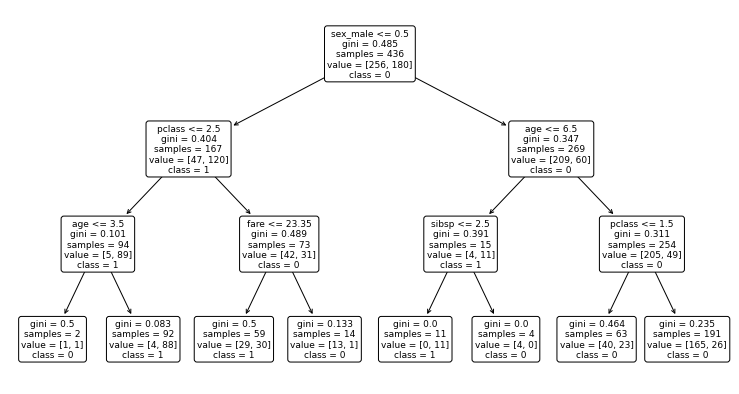

In [10]:
plt.figure(figsize=(13, 7))
plot_tree(clf, feature_names=X_train.columns,
          class_names=clf.classes_.astype(str), rounded=True)

In [11]:
train['prediction'] = clf.predict(X_train)

In [12]:
train.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,prediction
631,0,3,51.0,0,0,7.0542,1,1,0,1,0
108,0,3,38.0,0,0,7.8958,1,1,0,1,0
365,0,3,30.0,0,0,7.2500,1,1,0,1,0
701,1,1,35.0,0,0,26.2875,1,1,0,1,0
449,1,1,52.0,0,0,30.5000,1,1,0,1,0


## Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [13]:
# model score
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.81


In [14]:
y_pred = clf.predict(X_train)

In [15]:
pd.crosstab(train.survived, train.prediction)
# confusion_matrix(train.survived, train.prediction)

prediction,0,1
survived,,
0,223,33
1,51,129


In [16]:
# classfication report
y_pred = clf.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       256
           1       0.80      0.72      0.75       180

    accuracy                           0.81       436
   macro avg       0.81      0.79      0.80       436
weighted avg       0.81      0.81      0.81       436



#### Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [17]:
TP = 233
TN = 129
FP = 51
FN = 33


false_positive = FP/(FP+TN)
false_negative = FN/(FN+TP)
true_positive = TP/(TP+FN)
true_negative = TN/(TN+FP)

accuracy = (TP+TN)/(TP+TN+FP+FN)
precision = TP/(TP+TP)
recall = TP/(TP+FN)

# f-1 score and support score are inside of the classification report
print(f'False Positive: {false_positive}')
print(f'False Negative: {false_negative}')
print(f'True Positive: {true_positive}')
print(f'True Negative: {true_negative}')
print(f'Acurracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

False Positive: 0.2833333333333333
False Negative: 0.12406015037593984
True Positive: 0.8759398496240601
True Negative: 0.7166666666666667
Acurracy: 0.8116591928251121
Precision: 0.5
Recall: 0.8759398496240601


### Run through steps 2-4 using a different max_depth value.

In [18]:
clf2 = DecisionTreeClassifier(max_depth=4, random_state=123)

In [19]:
clf2 = clf2.fit(X_train,y_train)

In [20]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf2.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.83


In [21]:
train['prediction'] = clf2.predict(X_train)

In [22]:
y_pred = clf2.predict(X_train)

In [23]:
pd.crosstab(train.survived, train.prediction)

prediction,0,1
survived,,
0,250,6
1,70,110


In [24]:
TP = 250
TN = 110
FP = 70
FN = 6


false_positive = FP/(FP+TN)
false_negative = FN/(FN+TP)
true_positive = TP/(TP+FN)
true_negative = TN/(TN+FP)

accuracy = (TP+TN)/(TP+TN+FP+FN)
precision = TP/(TP+TP)
recall = TP/(TP+FN)

# f-1 score and support score are inside of the classification report
print(f'False Positive: {false_positive}')
print(f'False Negative: {false_negative}')
print(f'True Positive: {true_positive}')
print(f'True Negative: {true_negative}')
print(f'Acurracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

False Positive: 0.3888888888888889
False Negative: 0.0234375
True Positive: 0.9765625
True Negative: 0.6111111111111112
Acurracy: 0.8256880733944955
Precision: 0.5
Recall: 0.9765625


In [25]:
y_pred = clf2.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.98      0.87       256
           1       0.95      0.61      0.74       180

    accuracy                           0.83       436
   macro avg       0.86      0.79      0.81       436
weighted avg       0.85      0.83      0.82       436



#### Which model performs better on your in-sample data?
- Second Model Performs better

### Which model performs best on your out-of-sample data, the validate set?

In [26]:
y_val_pred_1 = clf.predict(X_validate)
y_val_pred_2 = clf2.predict(X_validate)

In [27]:
model1_validate_accuracy = clf.score(X_validate, y_validate)
model2_validate_accuracy = clf2.score(X_validate, y_validate)

print('Validate Model 1:',model1_validate_accuracy)
print('Validate Model 2:',model2_validate_accuracy)

Validate Model 1: 0.8351063829787234
Validate Model 2: 0.8031914893617021


## Work through these same exercises using the Telco dataset.

In [28]:
# aquire telco data
telco = aq.get_telco_data()

In [29]:
# prep telco data
df = prep.prep_telco(telco)

# train, validate, test telco data
train, validate, test = df

In [30]:
# what is the baseline for telco data?
# First, identify the observation: Churn
# did they churn or did they not churn? 

train.churn.value_counts()

0    2891
1    1046
Name: churn, dtype: int64

In [31]:
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,paperless_billing,monthly_charges,total_charges,...,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None
5919,Female,0,0,0,58,1,Yes,1,71.10,4299.20,...,0,1,0,0,1,0,0,1,0,0
1915,Male,0,0,1,71,1,Yes,1,85.45,6028.95,...,0,1,0,0,1,0,0,0,1,0
5054,Female,0,1,1,35,1,Yes,1,25.75,882.55,...,1,0,0,0,0,1,0,0,0,1
2355,Male,0,1,1,1,1,No,0,19.20,19.20,...,1,0,0,0,0,0,1,0,0,1
6279,Male,1,0,0,20,1,No,0,54.00,1055.90,...,0,1,0,0,0,0,1,1,0,0


In [32]:
train = train.drop(columns=['gender','contract_type',
                            'payment_type', 'internet_service_type',
                           'multiple_lines_No phone service',
                            'multiple_lines'])
train = train.replace({'Yes':1, 'No':0})

In [33]:
# for validate dataset
validate = validate.drop(columns=['gender','contract_type',
                            'payment_type', 'internet_service_type',
                           'multiple_lines_No phone service',
                            'multiple_lines'])
validate = validate.replace({'Yes':1, 'No':0})

In [34]:
train.head()

,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,monthly_charges,total_charges,churn,gender_Female,...,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None
5919,0,0,0,58,1,1,71.10,4299.20,0,1,...,0,1,0,0,1,0,0,1,0,0
1915,0,0,1,71,1,1,85.45,6028.95,0,0,...,0,1,0,0,1,0,0,0,1,0
5054,0,1,1,35,1,1,25.75,882.55,0,1,...,1,0,0,0,0,1,0,0,0,1
2355,0,1,1,1,1,0,19.20,19.20,0,0,...,1,0,0,0,0,0,1,0,0,1
6279,1,0,0,20,1,0,54.00,1055.90,0,0,...,0,1,0,0,0,0,1,1,0,0


# Takeaway:
- Since more people did not churn, we will use this as our baseline.

In [35]:
baseline = (train.churn == 0).mean()
baseline

0.7343154686309372

In [36]:
# Now, create an X, Y version of the datasets

# train dataset

X_train = train.drop(columns=['churn'])
y_train = train.churn

# validate dataset
X_validate = validate.drop(columns=['churn'])
y_validate = validate.churn

# test dataset
X_test = test.drop(columns=['churn'])
y_test = test.churn

- #### Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [37]:
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [38]:
clf = clf.fit(X_train, y_train)

[Text(362.7, 332.955, 'contract_type_Month-to-month <= 0.5\ngini = 0.39\nsamples = 3937\nvalue = [2891, 1046]\nclass = 0'),
 Text(181.35, 237.825, 'monthly_charges <= 93.775\ngini = 0.125\nsamples = 1772\nvalue = [1653, 119]\nclass = 0'),
 Text(90.675, 142.695, 'contract_type_One year <= 0.5\ngini = 0.072\nsamples = 1328\nvalue = [1278, 50]\nclass = 0'),
 Text(45.3375, 47.565, 'gini = 0.032\nsamples = 741\nvalue = [729, 12]\nclass = 0'),
 Text(136.0125, 47.565, 'gini = 0.121\nsamples = 587\nvalue = [549, 38]\nclass = 0'),
 Text(272.025, 142.695, 'total_charges <= 6586.2\ngini = 0.263\nsamples = 444\nvalue = [375, 69]\nclass = 0'),
 Text(226.6875, 47.565, 'gini = 0.353\nsamples = 214\nvalue = [165, 49]\nclass = 0'),
 Text(317.3625, 47.565, 'gini = 0.159\nsamples = 230\nvalue = [210, 20]\nclass = 0'),
 Text(544.05, 237.825, 'internet_service_type_Fiber optic <= 0.5\ngini = 0.49\nsamples = 2165\nvalue = [1238, 927]\nclass = 0'),
 Text(453.375, 142.695, 'tenure <= 5.5\ngini = 0.394\nsample

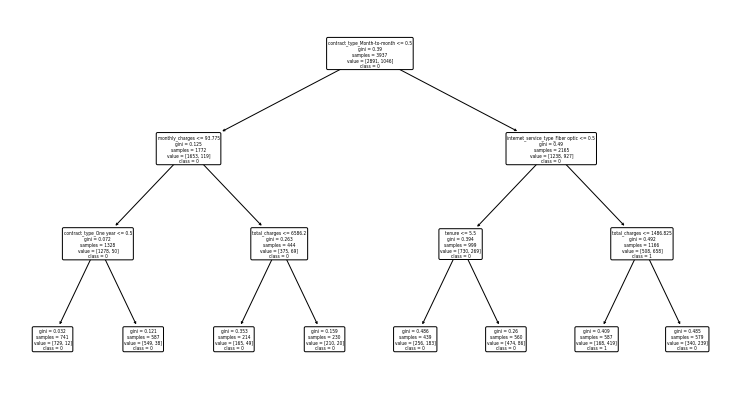

In [39]:
plt.figure(figsize=(13, 7))
plot_tree(clf, feature_names=X_train.columns,
          class_names=clf.classes_.astype(str), rounded=True)

In [40]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.80


In [41]:
# set prediticon
train['prediction'] = clf.predict(X_train)
y_pred = clf.predict(X_train)

In [42]:
# crosstab
pd.crosstab(train.churn, train.prediction)

prediction,0,1
churn,,
0,2723,168
1,627,419


In [43]:
TP = 2723
TN = 419
FP = 669
FN = 125


false_positive = FP/(FP+TN)
false_negative = FN/(FN+TP)
true_positive = TP/(TP+FN)
true_negative = TN/(TN+FP)

accuracy = (TP+TN)/(TP+TN+FP+FN)
precision = TP/(TP+TP)
recall = TP/(TP+FN)

# f-1 score and support score are inside of the classification report
print(f'False Positive: {false_positive}')
print(f'False Negative: {false_negative}')
print(f'True Positive: {true_positive}')
print(f'True Negative: {true_negative}')
print(f'Acurracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

False Positive: 0.6148897058823529
False Negative: 0.04389044943820225
True Positive: 0.9561095505617978
True Negative: 0.3851102941176471
Acurracy: 0.7982723577235772
Precision: 0.5
Recall: 0.9561095505617978


In [44]:
y_pred = clf.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      2891
           1       0.71      0.40      0.51      1046

    accuracy                           0.80      3937
   macro avg       0.76      0.67      0.69      3937
weighted avg       0.79      0.80      0.78      3937



### Run through steps 2-4 using a different max_depth value.

In [45]:
clf2 = DecisionTreeClassifier(max_depth=5, random_state=123)

In [46]:
clf2 = clf2.fit(X_train, y_train)

In [47]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf2.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.80


In [48]:
train['prediction'] = clf2.predict(X_train)
y_pred = clf2.predict(X_train)

In [49]:
pd.crosstab(train.churn, train.prediction)

prediction,0,1
churn,,
0,2755,136
1,637,409


In [50]:
TP = 2682
TN = 515
FP = 531
FN = 209


false_positive = FP/(FP+TN)
false_negative = FN/(FN+TP)
true_positive = TP/(TP+FN)
true_negative = TN/(TN+FP)

accuracy = (TP+TN)/(TP+TN+FP+FN)
precision = TP/(TP+TP)
recall = TP/(TP+FN)

# f-1 score and support score are inside of the classification report
print(f'False Positive: {false_positive}')
print(f'False Negative: {false_negative}')
print(f'True Positive: {true_positive}')
print(f'True Negative: {true_negative}')
print(f'Acurracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

False Positive: 0.5076481835564054
False Negative: 0.07229332410930474
True Positive: 0.9277066758906952
True Negative: 0.49235181644359466
Acurracy: 0.8120396240792481
Precision: 0.5
Recall: 0.9277066758906952


In [51]:
y_pred = clf2.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.88      2891
           1       0.75      0.39      0.51      1046

    accuracy                           0.80      3937
   macro avg       0.78      0.67      0.70      3937
weighted avg       0.80      0.80      0.78      3937



##### The second model is better with an accuracy of 81% 

### Which model performs best on your out-of-sample data, the validate set?

In [52]:
validate.head()

,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,monthly_charges,total_charges,churn,gender_Female,...,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None
816,0,1,0,27,1,0,95.00,2462.55,0,1,...,1,0,0,0,1,0,0,0,1,0
1488,0,1,0,71,1,0,89.30,6388.65,0,1,...,0,0,1,0,1,0,0,1,0,0
4796,0,0,0,44,0,1,54.00,2440.25,0,0,...,0,1,0,0,0,1,0,1,0,0
3213,0,1,1,27,1,0,19.90,550.10,0,1,...,0,0,1,0,0,0,1,0,0,1
5026,0,1,1,62,1,0,20.05,1263.90,0,0,...,0,0,1,0,1,0,0,0,0,1


In [53]:
model1_validate_accuracy = clf.score(X_validate, y_validate)
model2_validate_accuracy = clf2.score(X_validate, y_validate)

print('Validate Model 1:',model1_validate_accuracy)
print('Validate Model 2:',model2_validate_accuracy)

Validate Model 1: 0.7731042654028436
Validate Model 2: 0.7731042654028436


# Random Forest

## Exercises

Continue working in your model file with titanic data to do the following:

#### 1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [54]:
# aquire and prepare titanic data
titanic = aq.get_titanic_data()
df = prep.prep_titanic(titanic)

# train, validate, test
train, validate, test = df

In [55]:
# create X & y version of train, where y is a series with
#just the target variable and X are all the features. 

#train dataset
X_train = train.drop(columns=['survived'])
y_train = train.survived

# validate dataset
X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

# Test dataset
X_test = test.drop(columns=['survived'])
y_test = test.survived

In [56]:
# create Random Forst model
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=10, 
                            random_state=123)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [57]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.97


In [58]:
# make prediciton on the training sample
train['prediction'] = rf.predict(X_train)
train.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,prediction
631,0,3,51.0,0,0,7.0542,1,1,0,1,0
108,0,3,38.0,0,0,7.8958,1,1,0,1,0
365,0,3,30.0,0,0,7.2500,1,1,0,1,0
701,1,1,35.0,0,0,26.2875,1,1,0,1,1
449,1,1,52.0,0,0,30.5000,1,1,0,1,1


#### 2. Evaluate your results using the model score, confusion matrix, and classification report.



In [59]:
# model score
rf.score(X_train, y_train)

0.9724770642201835

#### 3.Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [60]:
# classification report 
class_report = pd.DataFrame(classification_report(y_train,
                                                  rf.predict(X_train),
                                                  output_dict=True)).T
class_report

,precision,recall,f1-score,support
0,0.962121,0.992188,0.976923,256.000000
1,0.988372,0.944444,0.965909,180.000000
accuracy,0.972477,0.972477,0.972477,0.972477
macro avg,0.975247,0.968316,0.971416,436.000000
weighted avg,0.972959,0.972477,0.972376,436.000000


In [61]:
# confusion matrix/crosstab
pd.crosstab(train.survived, train.prediction)

prediction,0,1
survived,,
0,254,2
1,10,170


In [62]:
TP = 254
TN = 170
FP = 10
FN = 2


false_positive = FP/(FP+TN)
false_negative = FN/(FN+TP)
true_positive = TP/(TP+FN)
true_negative = TN/(TN+FP)

accuracy = (TP+TN)/(TP+TN+FP+FN)
precision = TP/(TP+TP)
recall = TP/(TP+FN)

# f-1 score and support score are inside of the classification report
print(f'False Positive: {false_positive}')
print(f'False Negative: {false_negative}')
print(f'True Positive: {true_positive}')
print(f'True Negative: {true_negative}')

False Positive: 0.05555555555555555
False Negative: 0.0078125
True Positive: 0.9921875
True Negative: 0.9444444444444444


#### 4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.

# Using loops

In [63]:
for i in range(2, 11):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = forest.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Tree with max depth of 2
                    0           1  accuracy   macro avg  weighted avg
precision    0.756173    0.901786  0.793578    0.828979      0.816288
recall       0.957031    0.561111  0.793578    0.759071      0.793578
f1-score     0.844828    0.691781  0.793578    0.768304      0.781643
support    256.000000  180.000000  0.793578  436.000000    436.000000

Tree with max depth of 3
                    0           1  accuracy   macro avg  weighted avg
precision    0.792079    0.879699  0.818807    0.835889      0.828253
recall       0.937500    0.650000  0.818807    0.793750      0.818807
f1-score     0.858676    0.747604  0.818807    0.803140      0.812821
support    256.000000  180.000000  0.818807  436.000000    436.000000

Tree with max depth of 4
                    0           1  accuracy   macro avg  weighted avg
precision    0.803922    0.923077   0.83945    0.863499      0.853114
recall       0.960938    0.666667   0.83945    0.813802      0.839450
f1-score     

# increasing max depth

In [64]:
metrics = []

for i in range(2, 25):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.793578,0.808511,-0.014933
1,3,0.818807,0.813830,0.004978
2,4,0.839450,0.813830,0.025620
3,5,0.850917,0.813830,0.037088
4,6,0.883028,0.808511,0.074517
5,7,0.905963,0.829787,0.076176
6,8,0.931193,0.808511,0.122682
7,9,0.947248,0.819149,0.128099
8,10,0.972477,0.803191,0.169286
9,11,0.974771,0.803191,0.171579


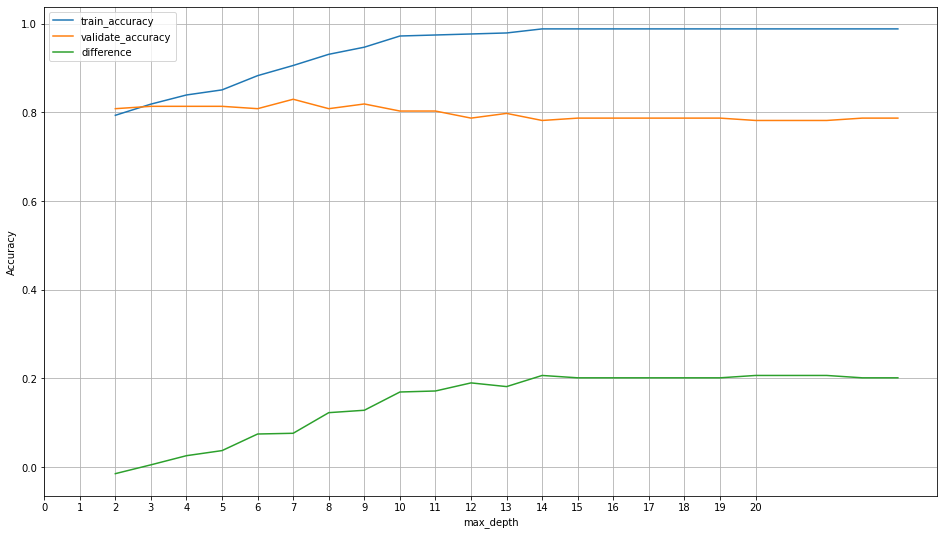

In [65]:
df.set_index('max_depth').plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

# Increasing samples per leaf, decreasing max depth

In [66]:
metrics = []
max_depth = 20

for i in range(2, max_depth):
    # Make the model
    depth = max_depth - i
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,18,0.912844,0.813830,0.099014
1,3,17,0.883028,0.824468,0.058559
2,4,16,0.871560,0.824468,0.047092
3,5,15,0.860092,0.819149,0.040943
4,6,14,0.841743,0.813830,0.027913
5,7,13,0.839450,0.808511,0.030939
6,8,12,0.830275,0.808511,0.021765
7,9,11,0.827982,0.808511,0.019471
8,10,10,0.830275,0.797872,0.032403
9,11,9,0.816514,0.792553,0.023961


# What if we increase both min_samples_per_leaf and max_depth

### What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

The first model with a lower sample leaf and higher max depth allowed the random forest model to fit well into this specific set of data with high accuracy on the train data.

# K-Nearest Neighbor Exercises

### Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [67]:
titanic = aq.get_titanic_data()
df = prep.prep_titanic(titanic)
train, validate, test = df

In [68]:
# create knn object
# weights = ['uniform', 'density']
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')


In [69]:
# Now, create an X, Y version of the datasets

# train dataset

X_train = train.drop(columns=['survived'])
y_train = train.survived

# validate dataset
X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

# test dataset
X_test = test.drop(columns=['survived'])
y_test = test.survived

In [70]:
# fit train 
knn = knn.fit(X_train, y_train)

# create predictions column on train
train['predictions'] = knn.predict(X_train)


#create predictions column on validate
validate['predictions'] = knn.predict(X_validate)

### Evaluate your results using the model score, confusion matrix, and classification report.

In [71]:
# model score
knn.score(X_train, y_train)

0.7729357798165137

In [72]:
# confusion matrix / crosttab

print("Confusion matrix: \n", confusion_matrix(train.survived, train.predictions))
print(" ")
pd.crosstab(train.survived, train.predictions)

Confusion matrix: 
 [[222  34]
 [ 65 115]]
 


predictions,0,1
survived,,
0,222,34
1,65,115


In [73]:
# classification report
report = pd.DataFrame(classification_report(y_train,
                                           knn.predict(X_train),
                                           output_dict=True)).T
report

,precision,recall,f1-score,support
0,0.773519,0.867188,0.817680,256.000000
1,0.771812,0.638889,0.699088,180.000000
accuracy,0.772936,0.772936,0.772936,0.772936
macro avg,0.772666,0.753038,0.758384,436.000000
weighted avg,0.772814,0.772936,0.768720,436.000000


In [74]:
# validate model 
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.77


### Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [75]:
TP = 222
TN = 115
FP = 65
FN = 34


false_positive = FP/(FP+TN)
false_negative = FN/(FN+TP)
true_positive = TP/(TP+FN)
true_negative = TN/(TN+FP)

accuracy = (TP+TN)/(TP+TN+FP+FN)
precision = TP/(TP+TP)
recall = TP/(TP+FN)

# f-1 score and support score are inside of the classification report
print(f'False Positive: {false_positive}')
print(f'False Negative: {false_negative}')
print(f'True Positive: {true_positive}')
print(f'True Negative: {true_negative}')

False Positive: 0.3611111111111111
False Negative: 0.1328125
True Positive: 0.8671875
True Negative: 0.6388888888888888


#### Run through setps 2-4 setting k to 20, Run through steps 2-4 setting k to 10

In [76]:
matrix = [10, 20]
for metrics in matrix:
    
    # set K to 10, then 20
    knn = KNeighborsClassifier(n_neighbors=metrics,
                               weights='uniform')
    
    knn = knn.fit(X_train, y_train)
    
    score = knn.score(X_train, y_train)
    
    # matrix
    conf_matrix = pd.crosstab(train.survived,
                                   train.predictions)
    # get classification report 
    report = pd.DataFrame(classification_report(y_train,
                                           knn.predict(X_train),
                                           output_dict=True)).T
    print(f"KNN where K={metrics}\n")
    print(f"Score= {score}\n")
    print(f"Confusion Matrix:\n\n{conf_matrix}\n\n")
    print(f"Classification Report:\n\n", report, "\n\n")
    print("-------------------------------------------------")
    

KNN where K=10

Score= 0.7408256880733946

Confusion Matrix:

predictions    0    1
survived             
0            222   34
1             65  115


Classification Report:

               precision    recall  f1-score     support
0              0.726984  0.894531  0.802102  256.000000
1              0.776860  0.522222  0.624585  180.000000
accuracy       0.740826  0.740826  0.740826    0.740826
macro avg      0.751922  0.708377  0.713343  436.000000
weighted avg   0.747575  0.740826  0.728815  436.000000 


-------------------------------------------------
KNN where K=20

Score= 0.6972477064220184

Confusion Matrix:

predictions    0    1
survived             
0            222   34
1             65  115


Classification Report:

               precision    recall  f1-score     support
0              0.689024  0.882812  0.773973  256.000000
1              0.722222  0.433333  0.541667  180.000000
accuracy       0.697248  0.697248  0.697248    0.697248
macro avg      0.705623  0.658073

#### What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

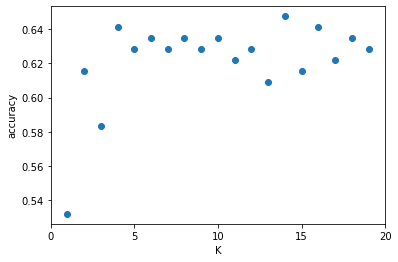

In [77]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('K')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,15,10,20])
plt.show()

#### The difference between the two models is 0.0435 (4.3%) with the K = 10 model performing slighly better than the K=20 model. This is due to the K10 model being more accurate and precise in the case of determining likelyhood of survival.

#### Which model performs best on our out-of-sample data from validate?

In [78]:
pd.crosstab(validate.survived, validate.predictions)

predictions,0,1
survived,,
0,83,27
1,33,45


In [79]:
TP = 83
TN = 45
FP = 33
FN = 27


false_positive = FP/(FP+TN)
false_negative = FN/(FN+TP)
true_positive = TP/(TP+FN)
true_negative = TN/(TN+FP)

accuracy = (TP+TN)/(TP+TN+FP+FN)
precision = TP/(TP+TP)
recall = TP/(TP+FN)

# f-1 score and support score are inside of the classification report
print(f'False Positive: {false_positive}')
print(f'False Negative: {false_negative}')
print(f'True Positive: {true_positive}')
print(f'True Negative: {true_negative}')

False Positive: 0.4230769230769231
False Negative: 0.24545454545454545
True Positive: 0.7545454545454545
True Negative: 0.5769230769230769


In [90]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_validate, y_validate)))

Accuracy of KNN classifier on training set: 0.71


In [91]:
matrix = [5, 10]
for metrics in matrix:
    
    # set K to 10, then 20
    knn = KNeighborsClassifier(n_neighbors=metrics,
                               weights='uniform')
    
    knn = knn.fit(X_validate, y_validate)
    
    
    # matrix
    conf_matrix = pd.crosstab(validate.survived,
                                   validate.predictions)
    # get classification report 
    report = pd.DataFrame(classification_report(y_validate,
                                           knn.predict(X_validate),
                                           output_dict=True)).T
    
    print(f"KNN where K={metrics}\n")
    print('Accuracy of KNN classifier on validation set: {:.2f}'
     .format(knn.score(X_validate, y_validate)), "\n")
    print(f"Confusion Matrix:\n\n{conf_matrix}\n\n")
    print(f"Classification Report:\n\n", report, "\n\n")
    print("--------------------------------------------------------")
    

KNN where K=5

Accuracy of KNN classifier on validation set: 0.75 

Confusion Matrix:

predictions   0   1
survived           
0            83  27
1            33  45


Classification Report:

               precision    recall  f1-score  support
0              0.744186  0.872727  0.803347   110.00
1              0.762712  0.576923  0.656934    78.00
accuracy       0.750000  0.750000  0.750000     0.75
macro avg      0.753449  0.724825  0.730141   188.00
weighted avg   0.751872  0.750000  0.742601   188.00 


--------------------------------------------------------
KNN where K=10

Accuracy of KNN classifier on validation set: 0.71 

Confusion Matrix:

predictions   0   1
survived           
0            83  27
1            33  45


Classification Report:

               precision    recall  f1-score     support
0              0.695035  0.890909  0.780876  110.000000
1              0.744681  0.448718  0.560000   78.000000
accuracy       0.707447  0.707447  0.707447    0.707447
macro avg

#### There is no difference between K10 and K20 on the validate data, however, the defaul K-Nearest Neighbor K5 data shows much more accuracy than the K10 or 20.  